In [18]:
def find_max_crossing_subarray(inputarray):


    #print(f'Current array is {inputarray}')
        
    #if len(inputarray) == 2:
    #    print(f'Case len == 2')
    #    return inputarray[0], inputarray[1], inputarray[0] + inputarray[1]
    #elif len(inputarray) == 1:
    #    print(f'Case len == 1')
    #    return inputarray[0], inputarray[0], inputarray[0]


    mid = int(len(inputarray) / 2)
    max_left = max(inputarray[0:mid])
    max_right = max(inputarray[mid:])



    left_sum = right_sum = -999999 # lowest number to make the first if sum work
    sum = 0
    for i in range(mid - 1, -1, -1): # sum from mid to index 0 
        sum = sum + inputarray[i]
        if (sum > left_sum):
            left_sum = sum
            index_left = i

    sum = 0
    j = mid

    while j < len(inputarray):
        sum = sum + inputarray[j]
        if (sum > right_sum):
            right_sum = sum
            index_right = j
        j = j + 1
    
    return index_left, index_right, left_sum + right_sum


#print(f'max_left is {max_left}, max_right is {max_right}, left sum {left_sum}, right sum {right_sum}')
    


In [46]:
def find_maximum_subarray(inputarray):
    if len(inputarray) == 1:
        return inputarray[0], inputarray[0], inputarray[0]
    
    mid = int(len(inputarray) / 2)

    left_low, left_high, left_sum = find_maximum_subarray(inputarray[0:mid])
    right_low, right_high, right_sum = find_maximum_subarray(inputarray[mid:])
    cross_low, cross_high, cross_sum = find_max_crossing_subarray(inputarray)

    if (left_sum >= right_sum) & (left_sum >= cross_sum):
        return left_low, left_high, left_sum
    elif (right_sum >= left_sum) & (right_sum >= cross_sum):
        return right_low, right_high, right_sum
    else:
        return cross_low, cross_high, cross_sum

In [47]:
#test_arr = [-5, 1, 2, 9, -5, 8]
#test_arr = [8, -3, -2, 4, 7]
#test_arr = [-6, -2, 8, 3, 4, -2]
test_arr = [2, -4, 7, 45, 10, -7, 36, 19]
#test_arr = [2, -4, 7, 45, 10]
#test_arr = [2, -1, 4, -5, 4, 3]
#x = find_max_crossing_subarray(test_arr)
#print(x)
'''
test1, test2, test3 = x
print(x)
print(test1)
print(test2)
print(test3)
'''
x = find_maximum_subarray(test_arr)
print(f'Mamimum subarray start from index {x[0]} end at index {x[1]} with the total sum of {x[2]}')


Mamimum subarray start from index 2 end at index 7 with the total sum of 110


In [ ]:
# Try to find runtime using recursion-tree method
# T(n) = 2T(n/2) + cn
# It will be O(1) if n = 1
# The subproblem size at dept i is (n/2^i)
# The subproblem size hits n = 1 when (n/2^i) = 1 or log2(n) levels
# The cost of each level
    # Number of nodes at depth i is 2^i
    # Each node at depth i has a cost of c(n/(2^i))^2
    # Total cost of all nodes at each depth is 2^i c(n/(2^i))^2
    # The bottom level at depth log2(n) has 2 ^ (log2(n)) same as (n^(log2(2)) nodes
    # each contributing cost of 1

# Top node = n and Bottom node is n^(log2(2)) = n
# Top node and Bottom is equal, thus we can find approximation by width * height
# width * height = n * log2(n) = n log n
# The approximate run times is O(n log(n))

# After comparing the actual time spent with the graph below, I think the actual time is quite close to the theoretical complexity.
# But I can clearly see that there are some spikes in the graph. I think it is from the hardware, because the spike
# different each time I run this code.


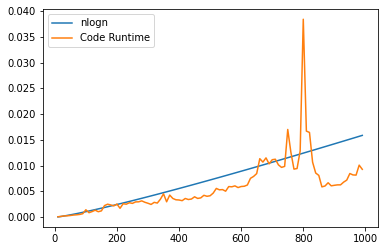

In [73]:
from random import sample
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt

# The range of n will be between 10 and 1000 with a growth rate of 10 per iteration
num_samples = range(10, 1000, 10)

# The constant value c shows somewhat of a match between nlogn and the algorithm
# This is probably  true for my PC due to hardware and might be a different value for other
c = 1/430000

timevals = []


y_nlogn = []
for n in num_samples:
    my_list = sample(range(n), n)
    y_nlogn.append(c * n * np.log(n))
    time = timeit('find_maximum_subarray(my_list)', number=1, globals=globals())
    timevals.append(time)
plt.plot(num_samples, y_nlogn, label='nlogn')
plt.plot(num_samples, timevals, label='Code Runtime')
plt.legend()
plt.show()
